# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Clustering, PCA, Latent Dirichlet Allocation
Week 7 | Lab 4.3

#### Setup your imports

In [1]:
import pandas as pd 
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn import metrics, datasets
import matplotlib.pyplot as plt

%matplotlib inline

# Part 1: The Iris Dataset

In [172]:
iris = datasets.load_iris()
X, y = iris.data, iris.target
X_scaled = StandardScaler().fit_transform(X)

We will start by going through the iris dataset. This has four dimensions, so if we want to visualise it we will need
to use dimensionality reduction. Let's do that with PCA and see what we get. Turns out most of the variance can
be explained by the first two principal components (check this), so we can just go ahead and use these and we capture most of the information already. So let's go ahead and plot our PCA-reduced dataset, and include the target labels as colours to see if we can notice any structure.

In [173]:
pca=PCA(n_components=2)
pca.fit(X_scaled)
X_reduced=pca.transform(X_scaled)
print(pca.explained_variance_ratio_)

[ 0.72770452  0.23030523]


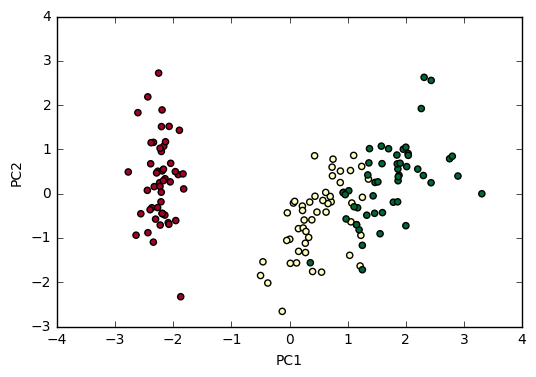

In [174]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1],  c=y, cmap=plt.cm.RdYlGn)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

Looks like we have some structure so let's try some clustering to assign the labels. You now have DBSCAN as well as kmeans and hierarchichal clustering so you can try these techniques and see what kind of results you can get. Note that a nice feature of DBSCAN is not having to state the number of clusters in advance (though of course you know the true number in this case, but generally you have an unsupervised problem). If
the labels are assigned the same way as in the original dataset, you could even consider this analagous to a prediction exercise and return a kind of accuracy score (but I stress here that the label assignment from the clustering would be arbitrary, so you would have to compare the labels manually to see if they align with the input before you return any such metrics). Alternatively, you can just eyeball the result. That's certainly what you would be doing normally, since clustering is generally an unsupervised approach in which you simply don't know what the underlying true value should be you are just looking for some structure.

Another point that could be confusing - you can perform your clustering on the PCA reduced dataset, or on the full four dimensional dataset. Since the PCA reduced dataset accounts for 95% of variance explained I do not expect you will see much or any difference in the results (of course a small number of points presumably might be assigned to different clusters in the new 2-dimensional space compared to the 4-dimensional space). But you of course can only readily visualise in the 2 dimensional space, so in this particular example that's the main benefit of PCA to us (don't underestimate the importance of visualising results). But generally reducing dimensions prior to clustering would be beneficial to reduce the fitting to noise.

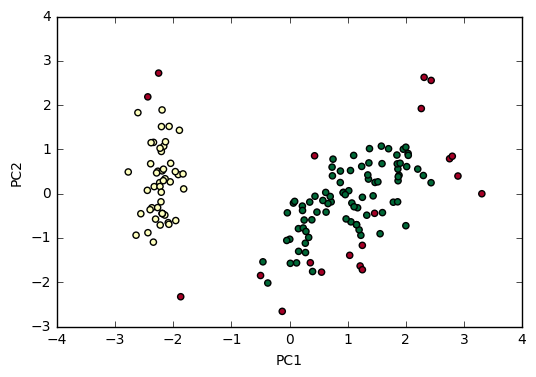

In [194]:
dbscn = DBSCAN(eps = 0.7, min_samples = 10).fit(X_scaled)  
labels_dbscan = dbscn.labels_
plt.scatter(X_reduced[:, 0], X_reduced[:, 1],  c=labels_dbscan, cmap=plt.cm.RdYlGn)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [183]:
kmeans = KMeans(n_clusters=3).fit(X_scaled)  
labels_kmeans = kmeans.labels_
plt.scatter(X_reduced[:, 0], X_reduced[:, 1],  c=labels_kmeans, cmap=plt.cm.RdYlGn)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [185]:
aggclus=AgglomerativeClustering(n_clusters=3).fit(X_scaled)
labels_aggclus=aggclus.labels_
plt.scatter(X_reduced[:, 0], X_reduced[:, 1],  c=labels_aggclus, cmap=plt.cm.RdYlGn)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

Do play around with this, try out the different clustering algorithms, and make sure the dimensionality reduction makes sense to you. Make sure you also explore which points from DBSCAN are core, which are border points, and which are unassigned to any cluster. Convince yourself that you are clear on the differences between the three clustering algorithms.

# Part 2: Airports Dataset

You might want to restart your kernel between parts of this lab, to avoid crossover of variable names.

In [496]:
airport_operations = pd.read_csv("./assets/datasets/airport_operations.csv")
airport_operations.head()

,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,ABQ,2004,53971,53818,0.8030,0.7809,0.7921,10.38,9.89,2.43,12.10,2.46,0.83,2.55,10.87
1,ABQ,2005,51829,51877,0.8140,0.7922,0.8001,9.60,9.79,2.29,11.20,2.26,0.89,2.34,10.24
2,ABQ,2006,49682,51199,0.7983,0.7756,0.7746,10.84,9.89,2.16,12.33,2.12,0.84,2.66,11.82
3,ABQ,2007,53255,53611,0.8005,0.7704,0.7647,11.29,10.34,2.40,12.95,2.19,1.29,3.06,12.71
4,ABQ,2008,49589,49512,0.8103,0.7844,0.7875,10.79,10.41,2.41,12.32,1.82,1.03,2.79,11.48


You saw this dataset before. Let's take some columns and see if we can get anything interesting from clustering. This is pretty open ended, and 
represents the kind of task you would often be given as a data scientist - that is to say, speculative exploration of the dataset to see what
kind of potentially interesting patterns you might find that can be leveraged for some commercial advantage.

In [500]:
# Take some columns and scale. We could use the y to label points for visualisation.

X = airport_operations[[
    'percent on-time gate departures',
    'percent on-time airport departures',
    'percent on-time gate arrivals',
    'average_gate_departure_delay',
    'average_taxi_out_time',
    'average taxi out delay',
    'average airport departure delay',
    'average airborne delay',
    'average taxi in delay',
    'average block delay',
    'average gate arrival delay'  
    ]]

X = StandardScaler().fit_transform(X)
y=airport_operations["airport"]

In [518]:
dbscn = DBSCAN(eps = 2, min_samples = 10).fit(X)
labels = dbscn.labels_  

In [519]:
np.unique(labels)

array([-1,  0,  1])

In [520]:
core_samples = np.zeros_like(labels, dtype = bool)  
core_samples[dbscn.core_sample_indices_] = True 

In [521]:
unique_labels = np.unique(labels)
colors = plt.cm.Spectral(np.linspace(0,1, len(unique_labels)))

In [522]:
pca=PCA(2)
pca.fit(X)
X_reduced=pca.transform(X)
pca.explained_variance_ratio_

array([ 0.5756525 ,  0.27008443])

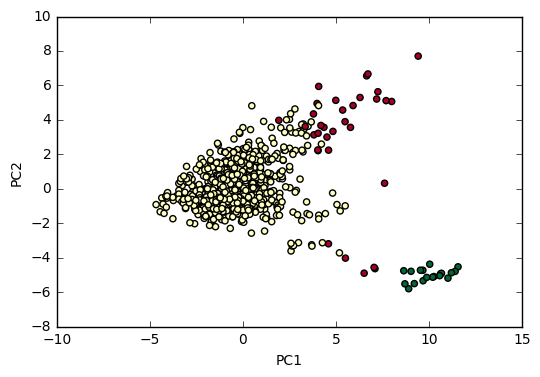

In [523]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1],  c=dbscn.labels_ , cmap=plt.cm.RdYlGn)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [473]:
# Initialise and fit the DBSCAN

eps=0.7
min_samples=10

dbscn = DBSCAN(eps = eps, min_samples = min_samples).fit(X_scaled)  

In [474]:
# Calculate the core samples

labels = dbscn.labels_  
core_samples = np.zeros_like(labels, dtype = bool)  
core_samples[dbscn.core_sample_indices_] = True 

# Part 3: Dealing with text using PCA and Clustering, and Latent Dirichlet Allocation

So we can look at text using the tools of dimensionality reduction and clustering to produce clusters of topics.  We can also use the popular Latent Dirichlet Allocation which produces a similar output with distinct methodology.

When performing PCA you will come across a difficulty that the sklearn vectorizers for text will return a memory-optimised sparse matrix, in which 0 values are removed. This is because you might expect many such 0 values and given the number of features the size of the matrix can become so large that it is difficult to store in RAM. In our case below we can simply convert our sparse matrix to a dense one, or we can use another PCA algorithm optimised to work with this matrix format called `TruncatedSVD`.

Sparse:
![](./assets/images/sparse.png)

Dense:
![](./assets/images/dense.png)

Note that some of this part of the lab is based on the sklearn documentation you can refer to [here](http://scikit-learn.org/stable/auto_examples/text/document_clustering.html)

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.preprocessing import Normalizer
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [30]:
from __future__ import print_function

In [31]:
# Let's just look at a well-separated subset of the categories available.

categories = [
    'rec.autos',
    'talk.politics.mideast',
    'sci.med',
    'rec.sport.baseball']
dataset = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42)
docs_raw = dataset.data
labels = dataset.target

In [32]:
# Take a look at one of the documents
docs_raw[1]

u"From: pb6755@csc.albany.edu (BROWN PHILIP H)\nSubject: Re: Bob Dylan Baseball Abstract\nDistribution: na\nOrganization: State University of New York at Albany\nLines: 8\nIn-Reply-To: moakler@romulus.rutgers.edu's message of 21 Apr 93 16:40:44 GMT\n\nI've never heard of the Bob Dylan Baseball Abstract, but I am curious.\nCould someone clue me in?\n\n--\n--------------------------\nPhil Brown                |\naka pb6755@csc.albany.edu |\n--------------------------\n"

Ok, let's fit a vectorizer to get some features. You could use a CountVectorizer or a TfidfVectorizer.

In [33]:
vectorizer = TfidfVectorizer(max_df=0.5, min_df=2, max_features=10000, stop_words='english')
X = vectorizer.fit_transform(docs_raw)

Let's go ahead and see if it's meaningful to cluster on this output already. I'd suggest kmeans to start with since you can sensibly know there are four clusters. You could also try some of the other clustering algorithms.

In [34]:
km = KMeans(n_clusters=4, init='k-means++', max_iter=100, n_init=1)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=4, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

How do we get word features from this? Well if we sort the clusters we can see those with highest tfidf using `argsort()` and then we can refer to the vectorizer with `get_feature_names` to return the actual word represented by that index.

In [35]:
# Something like this, depending on what you called your clustering

km.cluster_centers_.argsort()[:, ::-1]

array([[2214, 6875, 2577, ..., 5316, 5312, 4124],
       [1842, 2214, 1883, ..., 2797, 2796, 9999],
       [3979, 1344, 8930, ..., 5177, 5178, 4999],
       [4963, 4964, 5038, ..., 6442, 2575, 4999]])

In [36]:
# Note that depending on what you called your vectoriser, you can
# return the particular word represented by any index

terms = vectorizer.get_feature_names()
terms[4021]

u'geb'

In [37]:
# So you can use something like the following to return the top words
# depending on namings you used

order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(4):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

Cluster 0: com pitt cs university msg gordon geb banks posting host
Cluster 1: car com cars engine oil hp just usa new posting
Cluster 2: game baseball team year games com players hit runs win
Cluster 3: israel israeli jews armenian turkish armenians people arab jewish jake


See if you can make more sense of this with a dimensionality reduction. You could do PCA if you first transform the tfidf output to a dense
matrix with `toarray()`. However it's better optimised to work with TruncatedSVD, which should give you essentially the same output in a more optimised way (it will give slightly different result because the algorithm used is not the same, and you also have to use a `Normalizer` on the output of `TruncatedSVD`). How many dimensions to use? Well, you can compare the `explained_variance_ratio` by summing all the values after the dimensionality reduction and seeing if they are a reasonable proportion of the total for example. When you do the ordering of centroids in this case, you would have to do the inverse transform to return the original indices for the words. You can check the sklearn example to see this (link at the start of this section).

In [25]:
# Try PCA

X_scaled=StandardScaler().fit_transform(X.toarray())
pca = PCA(100, svd_solver="arpack")
normalizer = Normalizer(copy=False)
lsa2 = make_pipeline(pca, normalizer)
X_2 = lsa2.fit_transform(X_scaled)

In [39]:
# just to show this is one way to introspect a sparse matrix
from scipy import sparse
x=sparse.eye(10)
plt.spy(x)

In [26]:
pca.explained_variance_ratio_.sum()

0.22463174116491857

In [27]:
km = KMeans(n_clusters=4, init='k-means++', max_iter=100, n_init=1, random_state=1)
km.fit(X_2)
order_centroids = (pca.inverse_transform(km.cluster_centers_)).argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(4):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

Cluster 0: car com cars engine dealer ford oil hp price speed
Cluster 1: game baseball team games year players runs hit win braves
Cluster 2: medical cancer doctor disease information pitt thanks medicine health help
Cluster 3: israel israeli jews armenian turkish armenians people arab jewish government


In [23]:
# Try truncated SVD
# if you input the exact form you inputted into PCA you would get
# the same results, but the advantage of TruncatedSVD is that it can work
# directly with the sparse matrix, but this does mean that it outputs slightly different
# results in that case (test inputting the X_scaled we inputted to PCA and you will see it is the same)

svd = TruncatedSVD(100, algorithm="arpack")
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)
X_lsa = lsa.fit_transform(X)
svd.explained_variance_ratio_.sum()

0.22379505531943936

In [24]:
km = KMeans(n_clusters=4, init='k-means++', max_iter=100, n_init=1)
km.fit(X_lsa)
original_space_centroids = svd.inverse_transform(km.cluster_centers_)
order_centroids = original_space_centroids.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(4):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

Cluster 0: com pitt medical cancer know disease doctor information university msg
Cluster 1: com game baseball university year team posting games nntp host
Cluster 2: israel israeli jews armenian turkish people armenians arab jewish government
Cluster 3: car com cars engine dealer just new like good ford


Do play around with this and see how you can vary the results, and perhaps visualise them.

Since this can be a bit difficult to work with, I wanted to make sure you got a chance to see LDA. Using the code from the lesson see if you can create a more useer friendly and sensible output using this approach than the clustering.

In [28]:
lda_tf = LatentDirichletAllocation(n_topics=4)
lda_tf.fit(X)
pyLDAvis.sklearn.prepare(lda_tf, X, vectorizer)

/Users/generalassembly/anaconda2/lib/python2.7/site-packages/sklearn/decomposition/online_lda.py:508: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
1      88.599296        1       1  0.092895 -0.006342
0       4.800870        1       2 -0.055241 -0.020949
3       3.465976        1       3 -0.021738  0.022966
2       3.133858        1       4 -0.015916  0.004325, topic_info=     Category       Freq         Term      Total  loglift  logprob
term                                                              
6097  Default   9.000000          msg   9.000000  30.0000  30.0000
6468  Default  11.000000         ohio  11.000000  29.0000  29.0000
3364  Default  15.000000       engine  15.000000  28.0000  28.0000
944   Default  13.000000       andrew  13.000000  27.0000  27.0000
691   Default   6.000000          acs   6.000000  26.0000  26.0000
4727  Default   7.000000      indiana   7.000000  25.0000  25.0000
5628  Default   5.000000       magnus   5.000000  24.0000  24.0000
3310  Default   4.000000        eliot   4.000000  23.0000  23.0000
2634  Default   9.000000         cwru   9.000000  22.0000  22.0000
9714  Default  15.000000   washington  15.000000  21.0000  21.0000
3234  Default   6.000000          ecn   6.000000  20.0000  20.0000
1795  Default   4.000000     callison   4.000000  19.0000  19.0000
1549  Default   7.000000          bmw   7.000000  18.0000  18.0000
9505  Default   4.000000           v6   4.000000  17.0000  17.0000
5745  Default   4.000000    mattingly   4.000000  16.0000  16.0000
7111  Default   4.000000          pro   4.000000  15.0000  15.0000
9480  Default   7.000000       utexas   7.000000  14.0000  14.0000
1883  Default  22.000000         cars  22.000000  13.0000  13.0000
9436  Default   3.000000       uoknor   3.000000  12.0000  12.0000
9506  Default   3.000000           v8   3.000000  11.0000  11.0000
3369  Default   4.000000      engines   4.000000  10.0000  10.0000
9352  Default  10.000000           uk  10.000000   9.0000   9.0000
3372  Default   3.000000         engr   3.000000   8.0000   8.0000
2030  Default   4.000000      chinese   4.000000   7.0000   7.0000
9777  Default   3.000000  westminster   3.000000   6.0000   6.0000
8102  Default   3.000000  sensitivity   3.000000   5.0000   5.0000
8211  Default   4.000000        shift   4.000000   4.0000   4.0000
2582  Default   4.000000          csd   4.000000   3.0000   3.0000
6305  Default   6.000000       nissan   6.000000   2.0000   2.0000
6935  Default   4.000000           po   4.000000   1.0000   1.0000
...       ...        ...          ...        ...      ...      ...
726    Topic4   1.204046     adelaide   1.642374   3.1525  -6.6083
5815   Topic4   1.029420      melissa   1.445235   3.1236  -6.7650
5979   Topic4   0.975691     mmatusev   1.391490   3.1079  -6.8186
1125   Topic4   0.970771        askew   1.398019   3.0982  -6.8236
5746   Topic4   0.896162   matusevich   1.312181   3.0816  -6.9036
5012   Topic4   0.735221       jaskew   1.164871   3.0027  -7.1015
6280   Topic4   0.647541          ng4   1.073730   2.9572  -7.2285
6279   Topic4   0.633873           ng   1.091782   2.9192  -7.2499
5947   Topic4   0.454938     misisipi   0.883482   2.7992  -7.5816
2700   Topic4   0.492905        davew   1.008238   2.7473  -7.5014
9854   Topic4   0.491739    wonnacott   1.009875   2.7433  -7.5038
505    Topic4   0.387134        66758   0.856603   2.6687  -7.7429
5916   Topic4   0.386934        mimsy   0.856881   2.6679  -7.7435
4008   Topic4   0.302760       gauche   0.733840   2.5776  -7.9888
6126   Topic4   0.302758      murmurs   0.733842   2.5775  -7.9888
8627   Topic4   0.302718    stillness   0.733898   2.5773  -7.9889
6925   Topic4   0.302708     pleiades   0.733912   2.5773  -7.9889
8450   Topic4   0.768798         spam   1.865449   2.5765  -7.0569
8973   Topic4   0.298309        tents   0.750398   2.5404  -8.0036
1144   Topic4   0.370293       assign   0.938424   2.5330  -7.7874
2869   Topic4   0.287606      deserts   0.794421   2.4469  -8.0401
5739   Topic4  